In [190]:
import requests
import pandas as pd
import numpy as np
import matplotlib as plt
from bs4 import BeautifulSoup as soup
from scipy.stats import trim_mean

In [106]:
url = "https://www.basketball-reference.com/leagues/NBA_2022_totals.html"
data = requests.get(url)
#saving data to html file
with open("player-totals.html", "w", encoding="utf-8") as file:
    file.write(data.text)

#declaring str variable, which has html file content
with open("player-totals.html", encoding="utf-8") as file:
    page_raw = file.read() 

In [107]:
#using BeautifulSoup to pull data out of HTML file
nba_soup = soup(page_raw, 'html.parser' ) 
#wanted table in id="div_totals_stats"
player_totals_table = nba_soup.find(id="div_totals_stats")
player_totals_whole = pd.read_html(str(player_totals_table), index_col='Player')[0]
#droping rows duplicated rows 
player_totals_whole = player_totals_whole.drop_duplicates(subset=['Rk'])
#removing unwanted columns
player_totals = player_totals_whole.drop(['Rk','GS','MP','FG','FGA','FG%','3PA','3P%','2PA','2P%','eFG%','FT','FTA','FT%','ORB','DRB','TOV','PF'],axis=1)
player_totals

,Pos,Age,Tm,G,3P,2P,TRB,AST,STL,BLK,PTS
Player,,,,,,,,,,,
Precious Achiuwa,C,22,TOR,53,24,151,367,61,27,29,430
Steven Adams,C,28,MEM,60,0,165,592,199,51,44,419
Bam Adebayo,C,24,MIA,39,0,286,401,142,60,33,748
Santi Aldama,PF,21,MEM,27,4,33,64,14,2,7,90
LaMarcus Aldridge,C,36,BRK,44,14,231,247,40,14,45,593
...,...,...,...,...,...,...,...,...,...,...,...
Thaddeus Young,PF,33,TOT,32,6,89,115,69,29,9,209
Trae Young,PG,23,ATL,57,168,370,218,533,55,6,1600
Omer Yurtseven,C,23,MIA,45,1,116,258,45,15,19,270


In [108]:
#renaming columns
player_totals.rename(columns={'Pos':'Position',
                              'Tm':'Team',
                              'G':'Games',
                              'TRB':'Rebounds',
                              'AST':'Assists',
                              'STL':'Steals',
                              'BLK': 'Blocks',
                              'PTS':'Points'},inplace=True)
player_totals

,Position,Age,Team,Games,3P,2P,Rebounds,Assists,Steals,Blocks,Points
Player,,,,,,,,,,,
Precious Achiuwa,C,22,TOR,53,24,151,367,61,27,29,430
Steven Adams,C,28,MEM,60,0,165,592,199,51,44,419
Bam Adebayo,C,24,MIA,39,0,286,401,142,60,33,748
Santi Aldama,PF,21,MEM,27,4,33,64,14,2,7,90
LaMarcus Aldridge,C,36,BRK,44,14,231,247,40,14,45,593
...,...,...,...,...,...,...,...,...,...,...,...
Thaddeus Young,PF,33,TOT,32,6,89,115,69,29,9,209
Trae Young,PG,23,ATL,57,168,370,218,533,55,6,1600
Omer Yurtseven,C,23,MIA,45,1,116,258,45,15,19,270


In [109]:
#checking if NaN is in player_totals (if yes - converting existing NaN to 0)
player_totals.isna().sum() ## lack of NaN
#pt.replace(np.NaN,0,inplace=True)

Position    0
Age         0
Team        0
Games       0
3P          0
2P          0
Rebounds    0
Assists     0
Steals      0
Blocks      0
Points      0
dtype: int64

In [110]:
#droping row, which contains names similiar as 'old' columns name
player_totals = player_totals[player_totals.Games != 'G']
player_totals

,Position,Age,Team,Games,3P,2P,Rebounds,Assists,Steals,Blocks,Points
Player,,,,,,,,,,,
Precious Achiuwa,C,22,TOR,53,24,151,367,61,27,29,430
Steven Adams,C,28,MEM,60,0,165,592,199,51,44,419
Bam Adebayo,C,24,MIA,39,0,286,401,142,60,33,748
Santi Aldama,PF,21,MEM,27,4,33,64,14,2,7,90
LaMarcus Aldridge,C,36,BRK,44,14,231,247,40,14,45,593
...,...,...,...,...,...,...,...,...,...,...,...
Thaddeus Young,PF,33,TOT,32,6,89,115,69,29,9,209
Trae Young,PG,23,ATL,57,168,370,218,533,55,6,1600
Omer Yurtseven,C,23,MIA,45,1,116,258,45,15,19,270


In [111]:
#changing dtypes
dtypes_dict = {'Position':'string',
               'Age':'int64',
               'Team':'string',
               'Games':'int64',
               '3P':'int64',
               '2P':'int64',
               'Rebounds':'int64',
               'Assists':'int64',
               'Steals':'int64',
               'Blocks':'int64',
               'Points':'int64'
              }
player_totals = player_totals.astype(dtypes_dict)
player_totals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 594 entries, Precious Achiuwa to Ivica Zubac
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  594 non-null    string
 1   Age       594 non-null    int64 
 2   Team      594 non-null    string
 3   Games     594 non-null    int64 
 4   3P        594 non-null    int64 
 5   2P        594 non-null    int64 
 6   Rebounds  594 non-null    int64 
 7   Assists   594 non-null    int64 
 8   Steals    594 non-null    int64 
 9   Blocks    594 non-null    int64 
 10  Points    594 non-null    int64 
dtypes: int64(9), string(2)
memory usage: 55.7+ KB


In [112]:
#sorting players by gained points
player_totals = player_totals.sort_values('Points',ascending=False)
#birth_year column
player_totals["Birth_Year"] = 2021-player_totals.Age
player_totals

,Position,Age,Team,Games,3P,2P,Rebounds,Assists,Steals,Blocks,Points,Birth_Year
Player,,,,,,,,,,,,
DeMar DeRozan,PF,32,CHI,59,38,570,314,300,55,19,1655,1989
Trae Young,PG,23,ATL,57,168,370,218,533,55,6,1600,1998
Jayson Tatum,SF,23,BOS,61,169,382,506,258,58,42,1589,1998
Giannis Antetokounmpo,PF,27,MIL,52,60,459,598,313,53,73,1526,1994
Stephen Curry,PG,33,GSW,58,265,221,305,379,78,22,1493,1988
...,...,...,...,...,...,...,...,...,...,...,...,...
Jordan Bell,C,27,CHI,1,0,0,1,0,1,0,0,1994
Cat Barber,PG,27,ATL,3,0,0,3,3,0,0,0,1994
Jaylen Hoard,SF,22,OKC,1,0,0,2,0,0,0,0,1999


In [113]:
player_totals.describe()

,Age,Games,3P,2P,Rebounds,Assists,Steals,Blocks,Points,Birth_Year
count,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,25.752525,33.777778,39.079125,88.781145,141.715488,77.202020,24.279461,15.196970,347.314815,1995.247475
std,4.151154,20.087778,46.843093,98.840474,143.006886,95.889057,23.010578,19.187367,357.433276,4.151154
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1980.000000
25%,23.000000,14.000000,2.000000,9.000000,23.000000,8.000000,4.000000,2.000000,39.250000,1993.000000
50%,25.000000,38.500000,19.500000,57.500000,106.000000,43.000000,20.000000,9.000000,241.500000,1996.000000
75%,28.000000,52.000000,64.000000,135.750000,214.500000,108.750000,40.000000,22.000000,546.750000,1998.000000
max,41.000000,64.000000,265.000000,570.000000,774.000000,619.000000,111.000000,138.000000,1655.000000,2002.000000


In [114]:
#Teams
teams_names_count = len(player_totals['Team'].head(50).unique())
print(f'Best 50 contestants play in {teams_names_count} distinct NBA Teams')
best_10_teams  = player_totals['Team'].head(10).unique()
print('Best 10 contestnants play in: ','\n', best_10_teams)

Best 50 contestants play in 29 distinct NBA Teams
Best 10 contestnants play in:  
 <StringArray>
['CHI', 'ATL', 'BOS', 'MIL', 'GSW', 'PHI', 'DEN', 'MEM', 'PHO', 'MIN']
Length: 10, dtype: string


Text(0.5, 1.0, 'Oldest players teams')

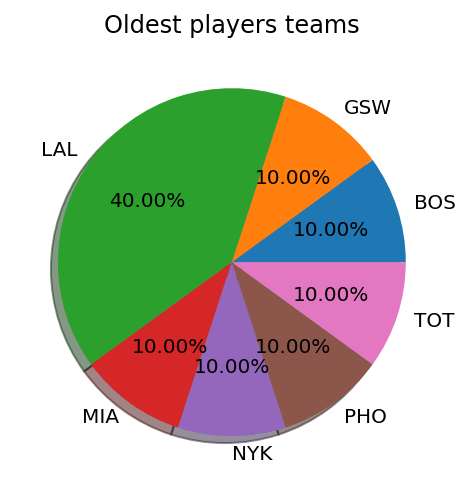

In [338]:
#Teams for 10 oldest players
best_10_players = player_totals.sort_values("Age", ascending=False).head(10)
best_10_players_g = best_10_players.groupby('Team')

teams = np.array(best_10_players_g.size().index)
count = np.array(best_10_players_g.size().values)

plt.pyplot.pie(count, labels=teams, autopct="%.2f%%", shadow=True)
plt.pyplot.title("Oldest players teams")

Text(0, 0.5, 'Occurrence')

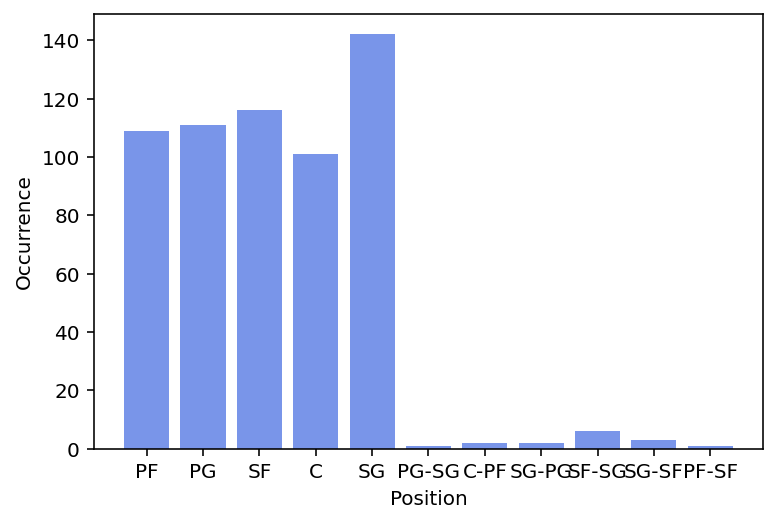

In [257]:
#the occurrence of unique positions in data

position = player_totals['Position']
unique_pos = position.values.unique()
num_occurrence = []

for p in unique_pos:
    o = position.value_counts()[p]
    num_occurrence.append(o)

plt.pyplot.bar(unique_pos, num_occurence, color='royalblue', alpha=0.7) 
plt.pyplot.xlabel("Position")
plt.pyplot.ylabel("Occurrence")

In [119]:
#show all players born in 80's
players_80 = player_totals[(player_totals.Birth_Year >= 1980) & (player_totals.Birth_Year <=1989)]
players_80

,Position,Age,Team,Games,3P,2P,Rebounds,Assists,Steals,Blocks,Points,Birth_Year
Player,,,,,,,,,,,,
DeMar DeRozan,PF,32,CHI,59,38,570,314,300,55,19,1655,1989
Stephen Curry,PG,33,GSW,58,265,221,305,379,78,22,1493,1988
LeBron James,SF,37,LAL,45,122,368,361,281,69,44,1297,1984
Russell Westbrook,PG,33,LAL,61,59,361,467,443,64,16,1105,1988
Kevin Durant,PF,33,BRK,37,69,320,271,211,28,35,1084,1988
...,...,...,...,...,...,...,...,...,...,...,...,...
Brook Lopez,C,33,MIL,1,2,1,5,0,1,3,8,1988
Darren Collison,PG,34,LAL,3,0,2,4,2,1,0,4,1987
Scotty Hopson,SG,32,OKC,1,0,2,1,1,0,0,4,1989


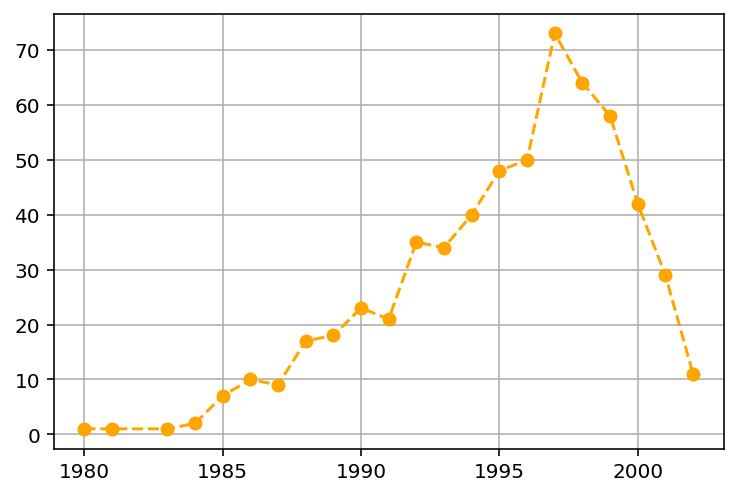

In [348]:
#players birth year
player_totals_birth = player_totals.groupby("Birth_Year").size()
years = np.array(player_totals_birth.index)
players_count = np.array(player_totals_birth.values)
plt.pyplot.plot(years,players_count,marker='o',color="Orange", linestyle="--")
plt.pyplot.grid(visible=True)

In [121]:
#maximum number of matches played in the ranking
max_games = player_totals.Games.max()
max_games

64

In [122]:
#memory usage
player_totals.memory_usage(deep=True)

Index         58877
Position      34988
Age            4752
Team          35640
Games          4752
3P             4752
2P             4752
Rebounds       4752
Assists        4752
Steals         4752
Blocks         4752
Points         4752
Birth_Year     4752
dtype: int64

In [234]:
#how many players in given teams
players_g = player_totals.groupby('Team')
print(f"There are at most {players_g.size().max()} players from the same team in the list")
players_g.size()

There are at most 80 players from the same team in the list


Team
ATL    19
BOS    15
BRK    14
CHI    19
CHO    15
CLE    19
DAL    20
DEN    18
DET    21
GSW    16
HOU    14
IND    13
LAC    14
LAL    19
MEM    23
MIA    18
MIL    16
MIN    16
NOP    14
NYK    19
OKC    23
ORL    19
PHI    15
PHO    18
POR    15
SAC    15
SAS    15
TOR    19
TOT    80
UTA    16
WAS    17
dtype: int64

In [140]:
summary = players_g.sum()
summary

,Age,Games,3P,2P,Rebounds,Assists,Steals,Blocks,Points,Birth_Year
Team,,,,,,,,,,
ATL,499,621,712,1674,2601,1443,385,261,6491,37900
BOS,403,547,673,1450,2631,1245,370,348,5806,29912
BRK,385,496,519,1521,2060,936,307,253,5317,27909
CHI,475,613,690,1927,2634,1516,438,279,6983,37924
CHO,361,589,868,1714,2766,1627,529,296,7006,29954
CLE,481,610,684,1667,2669,1453,414,263,6360,37918
DAL,530,672,783,1622,2657,1439,429,252,6569,39890
DEN,468,651,760,1680,2640,1637,437,218,6551,35910
DET,508,562,610,1451,2317,1316,438,255,5624,41933


In [149]:
#which team gained the smallest number of points
summary.sort_values('Points', ascending=True).head(1)

,Age,Games,3P,2P,Rebounds,Assists,Steals,Blocks,Points,Birth_Year
Team,,,,,,,,,,
IND,314,338,345,888,1390,665,220,234,3294,25959


In [259]:
#players in Memphis Grizzlies
players_in_MG = players_g.get_group('MEM').sort_values('Points', ascending=False)
players_in_MG

,Position,Age,Team,Games,3P,2P,Rebounds,Assists,Steals,Blocks,Points,Birth_Year
Player,,,,,,,,,,,,
Ja Morant,PG,22,MEM,50,80,437,292,332,59,19,1389,1999
Desmond Bane,SF,23,MEM,60,171,217,267,152,68,25,1051,1998
Jaren Jackson Jr.,PF,22,MEM,63,105,252,381,67,61,138,1041,1999
De'Anthony Melton,SG,23,MEM,55,88,108,254,146,89,29,546,1998
Brandon Clarke,PF,25,MEM,49,4,214,264,69,26,51,505,1996
Tyus Jones,PG,25,MEM,57,52,131,136,234,51,2,459,1996
Steven Adams,C,28,MEM,60,0,165,592,199,51,44,419,1993
Dillon Brooks,SF,26,MEM,21,33,112,69,57,27,4,387,1995
Kyle Anderson,PF,28,MEM,51,27,125,273,139,59,31,380,1993


<class 'pandas.core.frame.DataFrame'>


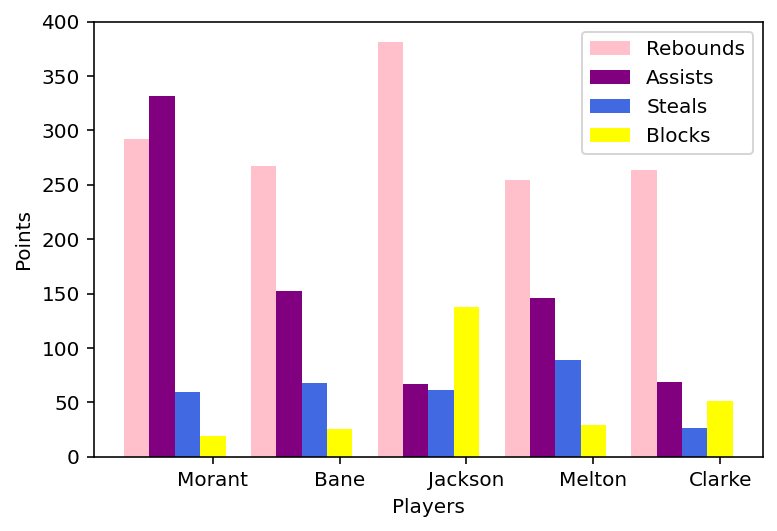

In [297]:
## points for rebounds, assissts, steals, blocks for 5 best players in Mem

best_5_players = players_in_MG.head(5)
players = np.array(best_5_players.index)
X = []
for player in players:
    temp = player.split()
    X.append(temp[1])
rebounds = np.array(best_5_players['Rebounds'])
assists = np.array(best_5_players['Assists'])
steals = np.array(best_5_players['Steals'])
blocks = np.array(best_5_players['Blocks'])

X_axis = np.arange(len(X))
plt.pyplot.bar(X_axis - 0.6, rebounds,0.2, label = 'Rebounds', color="Pink")
plt.pyplot.bar(X_axis - 0.4, assists,0.2, label = 'Assists', color="Purple")
plt.pyplot.bar(X_axis - 0.2, steals,0.2, label = 'Steals', color ="RoyalBlue")
plt.pyplot.bar(X_axis, blocks ,0.2, label = 'Blocks', color="Yellow")

plt.pyplot.xticks(X_axis, X)
plt.pyplot.xlabel("Players")
plt.pyplot.ylabel("Points")
plt.pyplot.legend()


In [157]:
!pip install scipy

In [161]:
def average_trimmed(x):
    return trim_mean(x, 0.1)

In [164]:
#Games summary
players_g["Games"].agg([np.min, np.max, np.mean, average_trimmed])

,amin,amax,mean,average_trimmed
Team,,,,
ATL,2,57,32.684211,33.058824
BOS,1,61,36.466667,37.307692
BRK,2,63,35.428571,35.916667
CHI,1,59,32.263158,32.529412
CHO,1,62,39.266667,40.461538
CLE,1,54,32.105263,32.647059
DAL,3,63,33.600000,33.750000
DEN,3,58,36.166667,36.875000
DET,1,63,26.761905,25.941176


In [188]:
#pivot table that shows how many points are gained, depending on position
pivot_table_points = player_totals.pivot_table(index=['Team','Position'], values='Points')
pivot_table_points.head(20)

Points
Team Position            
ATL  C         324.000000
     PF        356.250000
     PG        471.000000
     SF        155.750000
     SG        396.750000
BOS  C         403.000000
     PF        259.500000
     PG        653.000000
     SF        731.500000
     SG         99.800000
BRK  C         420.500000
     PF        478.500000
     PG        427.333333
     SF        252.000000
     SG        262.000000
CHI  C         290.500000
     PF        494.000000
     PG        270.000000
     SF        473.250000
     SG        290.666667